# stochastic gradient descent & (Learning Rate effect)

- Test stochastic gradient descent
- Test Cost function with stochastic gradient descent
- Test random instances picked up
- MiniBatch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('csv_files/ex1data1.csv')
df.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'food_truck_profit')

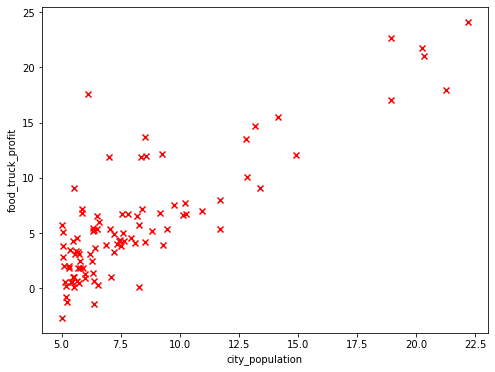

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(df['city_population'], df['food_truck_profit'], c='r',marker='x')
plt.xlabel('city_population')
plt.ylabel('food_truck_profit')

# Functions to help

In [4]:
def init_2d_graphs(*colors):
    plt.style.use(colors) # color of your 2d graph
    plt.figure(figsize=(10,6)) # set the figure size
    return True

In [5]:
init_2d_graphs('ggplot' )

True

<Figure size 720x432 with 0 Axes>

In [6]:
def display(thets_1, costs):
    plt.figure(figsize=(10, 6))
    plt.scatter(thets_1,costs, c='r', s=100, marker='.')
    plt.plot(thets_1,costs,  linewidth=2)
    plt.xlabel("thets_1")
    plt.ylabel("Cost")

In [7]:
def graph_fit_line(thets_0, thets_1):
    # Plot the graph with first 4 values of thetas and last values of thetas
    plt.figure(figsize=(10, 6))
    for i in range(3):
        y_hat = np.matmul(X, np.array([thets_0[i], thets_1[i]]).reshape(-1,1))
        plt.plot(X[:, 1], y_hat, label='predict ' + str(i+1), linewidth=2)
    y_hat = np.matmul(X, np.array([thets_0[-1], thets_1[-1]]).reshape(-1,1))
    plt.plot(X[:, 1], y_hat, label= 'last predict',linewidth=2)

    plt.scatter(X[:, 1],y, s = 100, c = 'r', marker = 'X', label =  'Training data')

    plt.title("The Relation between " + 'Population of City in 10,000s' + " And " + 'Profit in $10,000s' )
    plt.legend()
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

In [8]:
def display_values(thets_1, grd_vector, costs):
    for i in range(7):
        print(thets_1[i], "##", grd_vector[i],"##", costs[i])
    
    print(thets_1[-1],"##", grd_vector[-1], "##",costs[-1])

In [9]:
def intilize():
    X = np.array(df['city_population'])
    y = np.array(df['food_truck_profit'])
    X = X.reshape(-1, 1)
    print(X.shape)

    # Add x0
    X = np.c_[np.ones((X.shape[0], 1)), X]

    y = y.reshape(-1, 1)
    X_T = X.T
    thets_0 = []
    thets_1 = []
    costs = []
    grd_vector = []
    
    
    print(X.shape)
    print(y.shape)
    print(X_T.shape)
    
    return X, y, X_T, thets_0, thets_1, costs, grd_vector

In [10]:
t0, t1 = 1100, 1450
def learning_sechedule(t):
    return t0 / (t + t1)

# Test Stochastic Graident Descent

In [11]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


# Cost function (Convex Shape)
 
The cost function has three different parameters all are just fixed (does not change) except thetas here's (thetas batch)

- m is fixed number is about number of instances in your dataset
- X is about all your instances in the dataset and for each instance all the features it has
- y is the actual value of the instances in your data like when X 6.1101 y was 17.5920

So the cost function actually changes according to changes in these **thetas_batch**, and these values of **thetas_batch** change according to the **derivative of cost function with regard to each parameter theta** which till the gradient descent which direction should take to minimize the cost function.

When you make the **derivative of the cost function with regard to each parameter theta** you know how each of these parameters contributes to the error of the cost function, and then you change these parameters.

In [12]:
def cost_function(X, y, thetas_batch):
    m = X.shape[0]
    
    j = (1/(2*m)) * np.matmul((X.dot(thetas_batch) - y).T, (X.dot(thetas_batch) - y))
    return j.reshape(-1)[0]

# Stochastic Gradient Descent

In [13]:
def stochastic_gradient_descent(X, y, thetas_batch, learning_rate, epochs = 1, m_instances =10,  eta=False):
    m = X.shape[0]
    
    for i in range(epochs):
        for i in range(m_instances):
            rnd_indx = np.random.randint(m)
            instance_x = X[rnd_indx].reshape(1,-1)
            instance_y = y[rnd_indx].reshape(-1,1)
            graident_vector = (1/m) * (instance_x.T.dot(instance_x.dot(thetas_batch) - instance_y))
            grd_vector.append(round(graident_vector[1][0], 2))
            
            if(eta):
                learning_rate = learning_sechedule(epochs * m + i)
                thetas_batch = thetas_batch - (learning_rate * graident_vector)
            else:
                thetas_batch = thetas_batch - (learning_rate * graident_vector)
            thets_0.append(round(thetas_batch[0][0],2))
            thets_1.append(round(thetas_batch[1][0],2))
            costs.append(round(cost_function(X,y, thetas_batch),2))
    
    return costs, thets_0, thets_1


# check  learning_rate (Optimal Value) as with Batch Descent

- learning_rate=.01
- 10 epochs
- 30 epochs
- 50 epochs

# Note 1!

**May be random picked instances make the cost go up and down as we mentioned in summary**

This happend because you path a random instance for each iteration any may be this random instance is repeated, and for this, the to cost function irregular and from this fact it better to escape from the local minium in case of Non-convex cost function.

On average it will go toward the Minimum as we can see.

Change the epoch for [10 or 20 or 30] epoch you will find the cost function has a tiny and tiny change, this because as we mentioned in the summary it may bounce around the minium but never in the minium, which has a good weight but not the best weights, and to solve this we can reduce the learning rate as we approach the minimum.

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


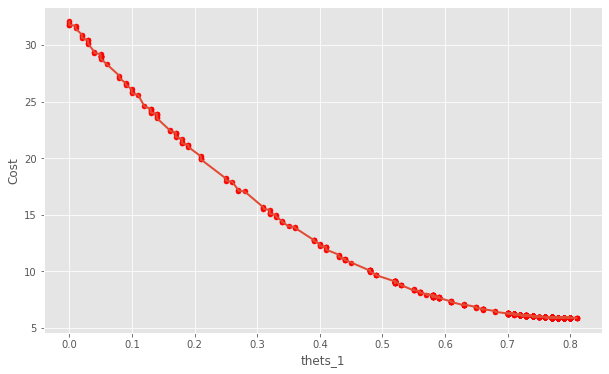

In [14]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
m_instances = X.shape[0]
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))

costs, thets_0, thets_1 = stochastic_gradient_descent(X, y, thetas_batch, .01, 10, m_instances)
display(thets_1, costs)

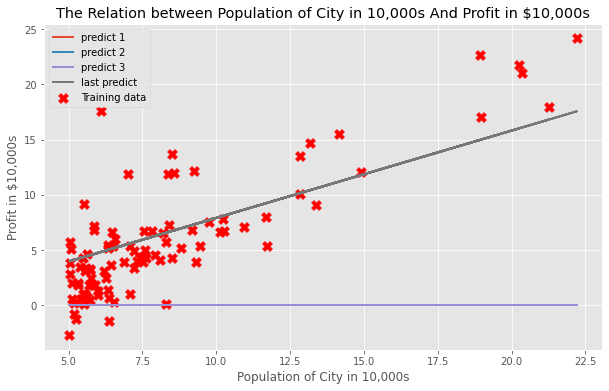

In [15]:
graph_fit_line(thets_0, thets_1)

Because we path one instance each graident step we can see that the different in change of the cost function between **stochastic graident descent** and the **batch descent** when we path the whole data for each step

In [16]:
display_values(thets_1, grd_vector, costs)

0.0 ## -0.19 ## 32.072733877455676
0.0 ## -0.25 ## 31.94
0.0 ## -0.03 ## 31.78
0.0 ## -0.09 ## 31.76
0.01 ## -0.37 ## 31.7
0.01 ## -0.85 ## 31.46
0.02 ## -0.23 ## 30.91
0.79 ## 0.23 ## 5.88


(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


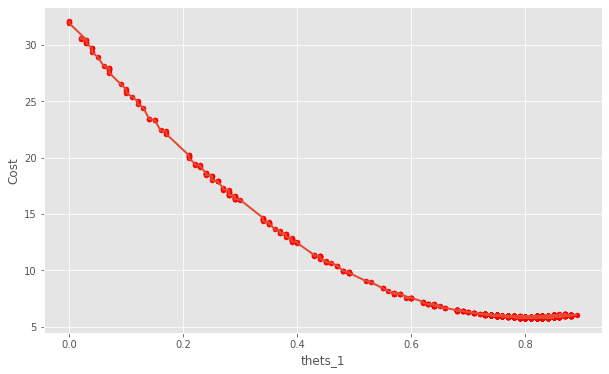

In [17]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
m_instances = X.shape[0]
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))

costs, thets_0, thets_1 = stochastic_gradient_descent(X, y, thetas_batch, .01, 30, m_instances)
display(thets_1, costs)

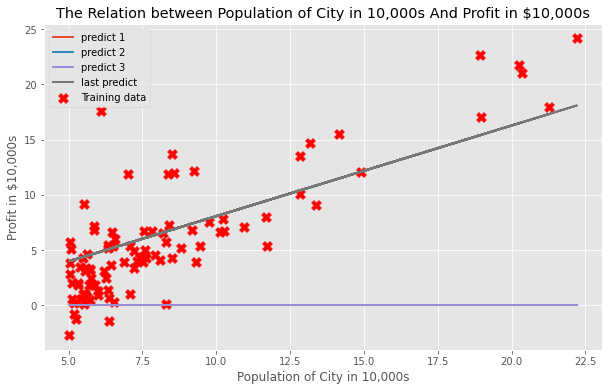

In [18]:
graph_fit_line(thets_0, thets_1)

In [19]:
display_values(thets_1, grd_vector, costs)

0.0 ## -0.09 ## 32.072733877455676
0.0 ## -0.16 ## 32.01
0.0 ## -2.26 ## 31.91
0.03 ## 0.15 ## 30.45
0.02 ## 0.1 ## 30.54
0.02 ## -0.27 ## 30.61
0.03 ## -0.24 ## 30.44
0.82 ## -0.09 ## 5.77


(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


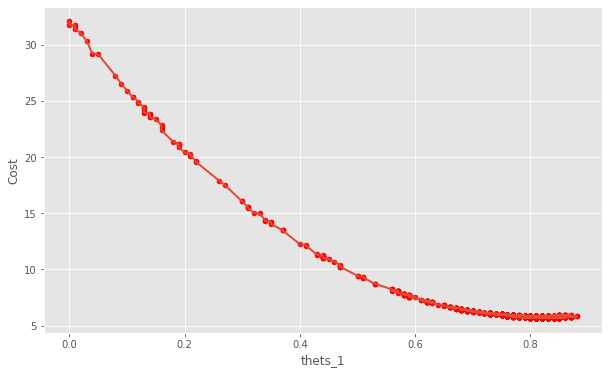

In [20]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
m_instances = X.shape[0]
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))

costs, thets_0, thets_1 = stochastic_gradient_descent(X, y, thetas_batch, .01, 50, m_instances)
display(thets_1, costs)

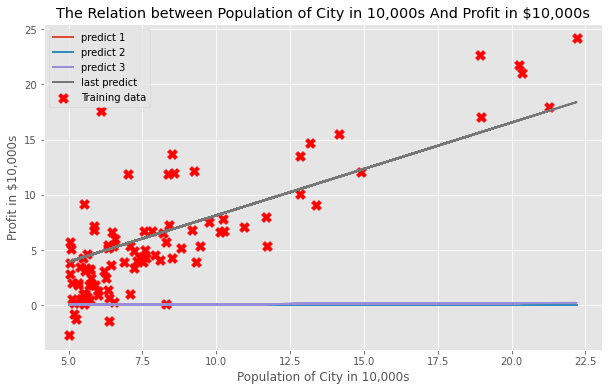

In [21]:
graph_fit_line(thets_0, thets_1)

In [22]:
display_values(thets_1, grd_vector, costs)

0.0 ## -0.49 ## 32.072733877455676
0.0 ## -0.03 ## 31.75
0.01 ## -0.07 ## 31.73
0.01 ## -0.39 ## 31.68
0.01 ## -0.62 ## 31.42
0.02 ## -1.05 ## 31.02
0.03 ## -1.79 ## 30.35
0.84 ## -0.09 ## 5.68


## !!
** from 5.88 to 5.78 to 5.73 **

# check schedule learning_rate 

We need to solve the problem of settle the minimum and never not in the minimum, this approach of solving is to decrease the learning rate as we approach the minimum and because the steps are smaller as we approach the minimum it will be more smaller when we decrease it scheduly, but should care of this change



(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


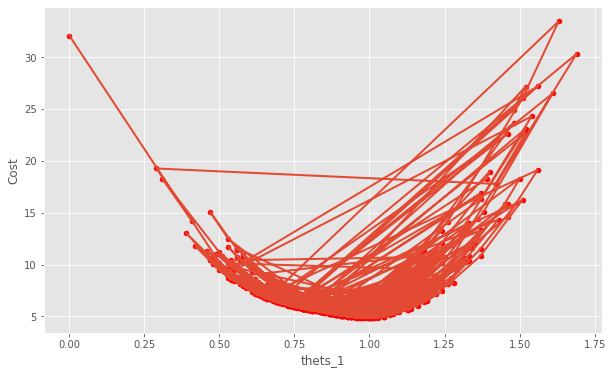

In [23]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
m_instances = X.shape[0]
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))

costs, thets_0, thets_1 = stochastic_gradient_descent(X, y, thetas_batch, .01, 10, m_instances, True)
display(thets_1, costs)

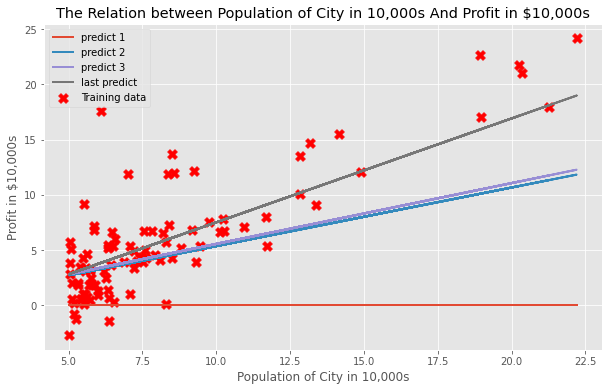

In [24]:
graph_fit_line(thets_0, thets_1)

In [25]:
display_values(thets_1, grd_vector, costs)

0.0 ## -1.16 ## 32.072733877455676
0.53 ## -0.04 ## 8.89
0.55 ## -0.01 ## 8.47
0.55 ## 0.28 ## 8.42
0.42 ## -0.18 ## 11.77
0.5 ## -0.09 ## 9.44
0.54 ## 0.14 ## 8.53
0.94 ## 0.02 ## 4.96


(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


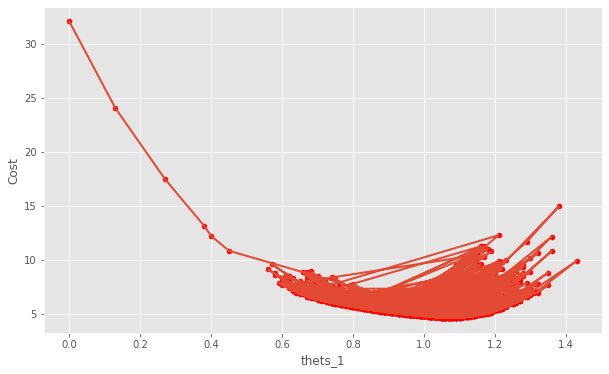

In [26]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
m_instances = X.shape[0]
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))

costs, thets_0, thets_1 = stochastic_gradient_descent(X, y, thetas_batch, .01, 30, m_instances, True)
display(thets_1, costs)

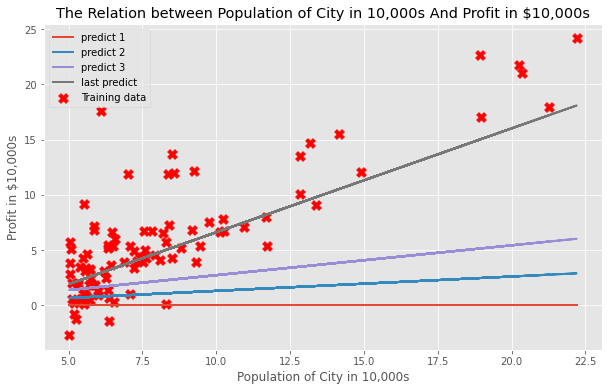

In [27]:
graph_fit_line(thets_0, thets_1)

In [28]:
display_values(thets_1, grd_vector, costs)

0.0 ## -0.53 ## 32.072733877455676
0.13 ## -0.53 ## 24.03
0.27 ## -0.43 ## 17.45
0.38 ## -0.11 ## 13.13
0.4 ## -0.18 ## 12.19
0.45 ## -1.82 ## 10.82
0.91 ## 0.1 ## 6.45
0.94 ## 0.34 ## 5.37


(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


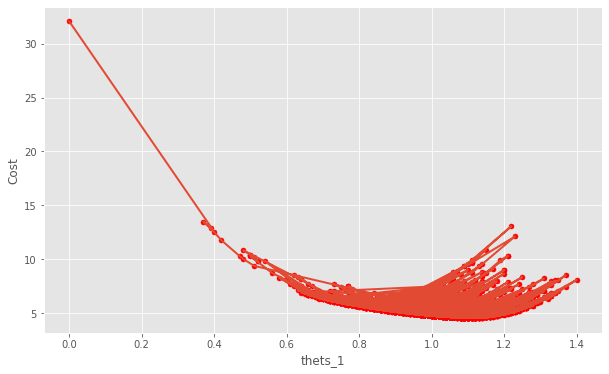

In [47]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
m_instances = X.shape[0]
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))

costs, thets_0, thets_1 = stochastic_gradient_descent(X, y, thetas_batch, .01, 50, m_instances, True)
display(thets_1, costs)

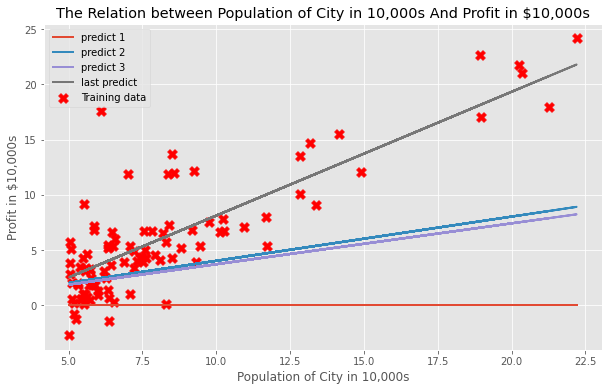

In [48]:
graph_fit_line(thets_0, thets_1)

In [49]:
display_values(thets_1, grd_vector, costs)

0.0 ## -2.26 ## 32.072733877455676
0.4 ## 0.16 ## 12.54
0.37 ## -0.1 ## 13.48
0.39 ## -0.2 ## 12.88
0.42 ## -0.28 ## 11.75
0.47 ## -0.06 ## 10.29
0.48 ## -0.15 ## 10.02
1.12 ## 0.25 ## 4.54


# stochastic Vs Batch

As we can see the difference from fixed learning rate to schedule learning rate and you can look at how the stochastic gradient descent because of irregular it Stelle at can never settle at the minimum, but as much close the schedule learning rate solve this problem and we can see the cost from **Batch in the image below: 4.84** to the cost of **stochastic 4.54**, but **Batch** run for 1500 iteration and each time it runs on the whole data, and **stochastic** run just 50 epochs(iteration), and for each epoch it path instance by instance.

<img src="Batch.png">

# Note !

May be the same instance takes more than once in the same epochs, and other ones not picked up, to solve this problem we can go from the first instance to the last one but shuffle the data at each epoch, but we need a better way to shuffle that data across different target variables (in case of classification).

# Using sklearn

tol = .0003, is to stop the learning once the difference between two gradient vectors is less than, so there is no progress we made but going in more iteration without any benefits.

In [55]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.01)
X = np.array(df['city_population'])
y = np.array(df['food_truck_profit'])
X = X.reshape(-1,1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([-2.06835479]), array([1.17559783]))

# Mini-Batch

Just instead of going instance by instance lets take **set of instances** together for each step, it useful to be **32** or Multiples of 2 for each set.

**This text is from the book dierctly**
"
The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradi‐ent Descent: at each step, instead of computing the gradients based on the full train‐ing set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you canget a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The  algorithm’s  progress  in  parameter  space  is  less  erratic  than  with  SGD,  especiallywith  fairly  large  mini-batches.  As  a  result,  Mini-batch  GD  will  end  up  walking around  a  bit  closer  to  the  minimum  than  SGD.  But,  on  the  other  hand,  it  may  be harder  for  it  to  escape  from  local  minima  (in  the  case  of  problems  that  suffer  from local  minima,  unlike  Linear  Regression  as  we  saw  earlier).  The graph show you the paths  taken  by  the  three  Gradient  Descent  algorithms  in  parameter  space  during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum,  while  both  Stochastic  GD  and  Mini-batch  GD  continue  to  walk  around.However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

<img src="diff.png">

# Summary

# SGD Vs Batch-Descent Vs Mini-Batch

The main problem of Batch-Descent was its train on the whole training set each gradient step, so it is slow and slow with a large and large dataset, and now for the massive dataset, and nowadays data may not fitting into your memory, so we need another way to go through the dataset instance by instance not for the whole instances of the data, since of that. 

The **stochastic gradient descent** which considers as **out-of-core** system, which came to solve the problem of slow learning in case of large dataset as well as when you need to go live and data comes in sequence (online-learning).

The word **stochastic** means that it picks a random instance for each step and computes the gradient based on a single instance, and because of that it less regular learning, and the cost function goes up and down (Check first graph). instead of decreasing untill it reach the minium in case of **Batch gradient**, but on average it going to a minimum.

Also because it irregular learning, it better to escape from **local minimum** when the cost function is not a convex shape which has no **local minimum** just **one global minimum.**, but on the other hand it goes bounce around the global minimum for a long time and never settle at the minimum, but we can solve this problem using the learning rate we talked about later, we know that if you have a fixed value (constant value) for the learning rate that never changes, the steps going to be small as you approach the minimum because the cost function for each iteration is going to be smaller, but what if we change the learning rate in a good way to be smaller and smaller then the steps will be smaller than expected till it coverage to the global minimum.

